# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Import statements for packages used in project
import numpy as np
import pandas as pd
import json
import requests
import tweepy
from IPython.display import Image
import os
import re
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the twitter archive from local storage. 
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Download the image predictions programatically
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Load the Twitter API data
df_tweet_data = pd.read_json('tweet-json.txt', lines=True)
df_tweet_data['tweet_id'] = df_tweet_data['id']
df_tweet_data = df_tweet_data[['tweet_id', 'favorite_count', 'retweet_count', 'created_at', 'source', 'retweeted_status']]
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id            2354 non-null int64
favorite_count      2354 non-null int64
retweet_count       2354 non-null int64
created_at          2354 non-null datetime64[ns]
source              2354 non-null object
retweeted_status    179 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 110.4+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing twitter archive data

#### Visual Assessment

In [6]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Programmatic Assessment using Pandas' functions and/or methods

In [7]:
#dulicate
sum(df_twitter_archive['tweet_id'].duplicated())

0

In [8]:
#ratting 
print(df_twitter_archive['rating_denominator'].describe())

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64


In [9]:
print(df_twitter_archive['rating_denominator'].value_counts())

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [10]:
# Sort the names to see any case issues
df_twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [11]:
# name having length less than 3 or 'None'
df_twitter_archive[df_twitter_archive['name'].apply(lambda x: str(x)=='None' or len(str(x)) < 3)]['name']

5       None
7       None
12      None
24      None
25      None
30      None
32      None
35      None
37      None
41      None
42      None
47      None
55      None
56         a
59      None
62      None
64      None
72      None
78      None
83      None
88      None
89      None
93      None
96      None
99      None
100     None
101     None
103     None
110     None
112     None
        ... 
2322    None
2323    None
2324    None
2327       a
2328    None
2329    None
2330    None
2331    None
2332    None
2333      an
2334       a
2335      an
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2347       a
2348       a
2349      an
2350       a
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, Length: 824, dtype: object

In [12]:
# printing first tweet of every possible value of 'rating_denominator'
denominator = df_twitter_archive['rating_denominator'].value_counts()
for c, i in enumerate(denominator.index):
    print(f"{c}: {df_twitter_archive.loc[df_twitter_archive['rating_denominator'] == i, 'text'].values[0]}")

0: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
2: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
3: Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
4: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
5: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
6: I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
7: Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
8: The floofs have been released I repeat the floofs have been 

In [13]:
# printing first tweet of every possible value of 'rating_numerator'
numerator = df_twitter_archive['rating_numerator'].value_counts()
for c, i in enumerate(numerator.index):
    print(f"{c}: {df_twitter_archive.loc[df_twitter_archive['rating_numerator'] == i, 'text'].values[0]}")

0: This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
1: Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4
2: @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
3: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
4: RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
5: RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
6: I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
7: This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1

In [14]:
# Check for any null numerator values of archive data
sum(df_twitter_archive.rating_numerator.isnull())
0

0

In [15]:
# Check for any null denominator values of archive data
sum(df_twitter_archive.rating_denominator.isnull())

0

In [16]:
# consider only orignal tweets (no retweets) 
df_twitter_archive[df_twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Assessing prediction data

#### Visual Assessment

In [17]:
#visual assessment of image prediction data
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Programmatic Assessment using Pandas' functions and/or methods

In [18]:
# Check for any duplicated images of image prediction data
len(df_image_prediction[df_image_prediction.jpg_url.duplicated()])

66

In [19]:
# missing rows
len(df_twitter_archive) - len(df_image_prediction)

281

In [20]:
#This is an image for tweet_id 892177421306343426
Image(url = 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg')

### Assessing Twitter API data

#### Visual Assessment 

In [21]:
df_tweet_data

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status
0,892420643555336193,39467,8853,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN
1,892177421306343426,33819,6514,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN
2,891815181378084864,25461,4328,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN
3,891689557279858688,42908,8964,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN
4,891327558926688256,41048,9774,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN
5,891087950875897856,20562,3261,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN
6,890971913173991426,12041,2158,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",NaN
7,890729181411237888,56848,16716,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",NaN
8,890609185150312448,28226,4429,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN
9,890240255349198849,32467,7711,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN


#### Programmatic Assessment using Pandas' functions and/or methods

In [22]:
# missing rows
len(df_twitter_archive) - len(df_tweet_data)

2

In [23]:
# duplicates
sum(df_tweet_data['tweet_id'].duplicated())

0

### Quality issues
1. timestamp 'object' datatype.

2. twitter archive data contains retweets

3. name has values that are string 'None' instead of NaN & some values have unusual names of less than 3 characters such as 'an','a'.

4. Some tweets are not about dogs, so doesn't contain rating

5. Some of the ratings contain decimal 

6. Missing rows in image prediction dataset (2075 rows instead of 2356) either some tweets didn't have dog images or rows are missing.

7. p1, p2, and p3 contains underscores instead of spaces in the string.

8. tweet_id is an integer

9. Remove columns no longer needed

10. There are some duplicate jpg_urls.


### Tidiness issues
1. Combine the 4 dog stage columns into a single column in the archive table

2. The different dataframes should be merged into a single one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
df_archive_clean = df_twitter_archive.copy()
df_images_clean = df_image_prediction.copy()
df_api_clean = df_tweet_data.copy()

## Cleaning Tidiness issues

### Tidiness issue #1: The different dataframes should be merged into a single one.

#### Define: Merge all data frame together

#### Code

In [25]:
# Merge the archive and prediction tables into a single data frame
df_combined_data = pd.merge(df_archive_clean, df_images_clean, on='tweet_id')
# Merge the tweet_json table into the combined_archive data frame
df_combined_data = pd.merge(df_combined_data, df_api_clean, on='tweet_id')

#### Test

In [26]:
# Verify the structure of the new combined dataframe
df_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source_x                      2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [27]:
df_combined_data.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,source_y,retweeted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,39467,8853,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,33819,6514,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,25461,4328,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,42908,8964,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN


### Tidiness issue #2: Combine the 4 dog stage columns into a single column in the archive table 

#### Define Single column for dog stages

#### Code

In [28]:
# Extract the dog stage names from the the 4 individual columns and combine into one 'stage' column

stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    df_combined_data[stage] = df_combined_data[stage].apply(lambda x: np.NaN if x == 'None' else x)
    
df_combined_data['stage'] = df_combined_data[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
df_combined_data['stage'] = df_combined_data['stage'].apply(lambda x: x.replace('nan', ''))
df_combined_data['stage'] = df_combined_data['stage'].apply(lambda x: np.NaN if x == '' else x)

df_combined_data['stage'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [29]:
# Drop the 4 individual dog stage columns
drop_col = ['doggo', 'floofer', 'pupper', 'puppo']
df_combined_data.drop(drop_col, axis=1, inplace=True)

#### Test

In [30]:
# Verify that the 4 dog stage columns have merged into a single stage column
df_combined_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'created_at', 'source_y',
       'retweeted_status', 'stage'],
      dtype='object')

In [31]:
# View the value counts for the new stage column
df_combined_data['stage'].value_counts()

pupper           210
doggo             67
puppo             23
doggo pupper      11
floofer            7
doggo floofer      1
doggo puppo        1
Name: stage, dtype: int64

## Cleaning Quality issues

### Quality issue #1: timestamp 'object' datatype

#### Define Change dtype of timestamp to datetime

#### Code

In [32]:
# change the 'timestamp' column to a datetime object
df_combined_data['timestamp'] = pd.to_datetime(df_combined_data['timestamp'])

#### Test

In [33]:
df_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source_x                      2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                     

### Quality issue #2: twitter archive data contains retweets

#### Define Remove retweets

#### Code

In [34]:
# consider only orignal tweets (no retweets) 
df_combined_data = df_combined_data[df_combined_data['retweeted_status_id'].isnull()]
# remove retweet related columns
df_combined_data = df_combined_data.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

### Test

In [35]:
df_combined_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'created_at', 'source_y',
       'retweeted_status', 'stage'],
      dtype='object')

In [36]:
df_combined_data.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,source_y,retweeted_status,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,banana,0.076110,False,39467,8853,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,papillon,0.068957,True,33819,6514,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,kelpie,0.031379,True,25461,4328,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,True,spatula,0.040836,False,42908,8964,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,German_short-haired_pointer,0.175219,True,41048,9774,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN


### Quality issue #3: name has values that are string 'None' instead of NaN & some values have unusual names of less than 3 characters such as 'an','a'.

#### Define Fix naming issue

#### Code

In [37]:
# filter names starting with a lowercase letter
lowercase_names = []
for lists in df_combined_data['name']:
    if lists[0].islower() and lists not in lowercase_names:
        lowercase_names.append(lists)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [38]:
# replace names starting with a lowercase letter with NaNs
df_combined_data['name'].replace(lowercase_names, np.nan, inplace = True)

# replace 'None' with NaN
df_combined_data['name'].replace('None', np.nan, inplace = True)

#### Test

In [39]:
# verify the fix
lowercase_names[0] in df_combined_data['name']

False

### Quality issue #4: Some tweets are not about dogs, so doesn't contain rating

#### Define fix rating issue

### Code

In [40]:
# list tweets where rating is in decimal
rate_in_decimal = df_combined_data[df_combined_data['text'].str.contains(r"(\d+\.\d*\/\d+)")]
print(rate_in_decimal[['tweet_id', 'rating_numerator', 'text']].values)

[[883482846933004288 5
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948']
 [786709082849828864 75
  "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]
 [778027034220126208 27
  "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]
 [680494726643068929 26
  'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [41]:
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in df_combined_data['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

In [42]:
# replace incorrect rating with correct decimal rating in numerator from text
for i in range(len(ratings_with_decimals)):
    df_combined_data.loc[ratings_with_decimals_index[i],'rating_numerator'] = float(ratings_with_decimals[i])

In [43]:
# add new 'rating' column by dividing rating_numerator by rating_denominator
df_combined_data['rating'] = df_combined_data['rating_numerator'] / df_combined_data['rating_denominator']

#### Test

In [44]:
rate_in_decimal = df_combined_data[df_combined_data['text'].str.contains(r"(\d+\.\d*\/\d+)")]
print(rate_in_decimal[['tweet_id', 'rating_numerator', 'text']].values)

[[883482846933004288 13.5
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948']
 [786709082849828864 9.75
  "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]
 [778027034220126208 11.27
  "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]
 [680494726643068929 11.26
  'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [45]:
df_combined_data['rating']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
19      1.2
20      1.3
21      1.4
22      1.3
23      1.3
24      1.2
25      1.3
26      1.3
27      1.3
28      1.2
29      1.3
       ... 
2043    0.2
2044    0.7
2045    0.9
2046    1.1
2047    0.6
2048    0.8
2049    1.0
2050    0.9
2051    0.3
2052    0.5
2053    1.1
2054    1.0
2055    0.1
2056    1.1
2057    0.8
2058    0.9
2059    0.6
2060    1.0
2061    0.9
2062    1.0
2063    0.8
2064    0.9
2065    1.0
2066    0.2
2067    1.0
2068    0.5
2069    0.6
2070    0.9
2071    0.7
2072    0.8
Name: rating, Length: 1994, dtype: float64

### Quality issue #5: p1, p2, and p3 contains underscores instead of spaces in the string.

#### Define Replace underscore with space in p1, p2, and p3

#### Code

In [46]:
# replace underscores with spaces in p1, p2, and p3
df_combined_data['p1'].replace('_', ' ', regex=True, inplace = True)
df_combined_data['p2'].replace('_', ' ', regex=True, inplace = True)
df_combined_data['p3'].replace('_', ' ', regex=True, inplace = True)

#### Test

In [47]:
df_combined_data['p1']

0                            orange
1                         Chihuahua
2                         Chihuahua
3                       paper towel
4                            basset
5          Chesapeake Bay retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish terrier
9                          Pembroke
10                          Samoyed
11                   French bulldog
12                         Pembroke
13                   French bulldog
14                 golden retriever
15                          whippet
16                 golden retriever
17                 golden retriever
18                   Siberian husky
19                   French bulldog
20                           basset
21                        limousine
22                         Pembroke
23                 Mexican hairless
24                          Samoyed
25                        Chihuahua
26                           kuvasz
27                      conv

### Quality issue #6: tweet_id is an integer

#### Define Change dtype of tweet_id to str

#### Code 

In [48]:
# fix tweet_id to str/object
df_combined_data['tweet_id'] = df_combined_data['tweet_id'].astype(str)

#### Test

In [49]:
df_combined_data['tweet_id'].dtype

dtype('O')

### Quality issue #7: Remove columns no longer needed

#### Define Remove unused columns

#### Code

In [50]:
# drop columns
df_combined_data.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source_x', 'source_y',
              'img_num'], axis=1, inplace=True)

In [51]:
df_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1350 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
created_at            1994 non-null datetime64[ns]
retweeted_status      

### Quality issue #8: There are some duplicate jpg_urls.

#### Define Drops rows with duplicates in the jpg_url column

#### Code

In [52]:
# Drop all rows with duplicate addresses for jpg_url
df_combined_data = df_combined_data.drop_duplicates(subset='jpg_url')

#### Test

In [53]:
# Verify that there are no longer duplicate entries for jpg_url
len(df_combined_data[df_combined_data.jpg_url.duplicated()])

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
df_combined_data.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [55]:
twitter_data = pd.read_csv('twitter_archive_master.csv')

### Insights:
1. The Top 5 common dog name is Charlie, Oliver, Lucy, Cooper and Penny 

2. The most common dog type is golden retriever

3. The mean rating numerator is 12. Most dogs have a rating numerator between 10 & 12. The clumber has the highest mean rating numerator at 27.

In [56]:
# Find the total occurrences of each dog name in the cleaned combined_archive dataframe
twitter_data.name.value_counts().head(5)

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Penny       9
Name: name, dtype: int64

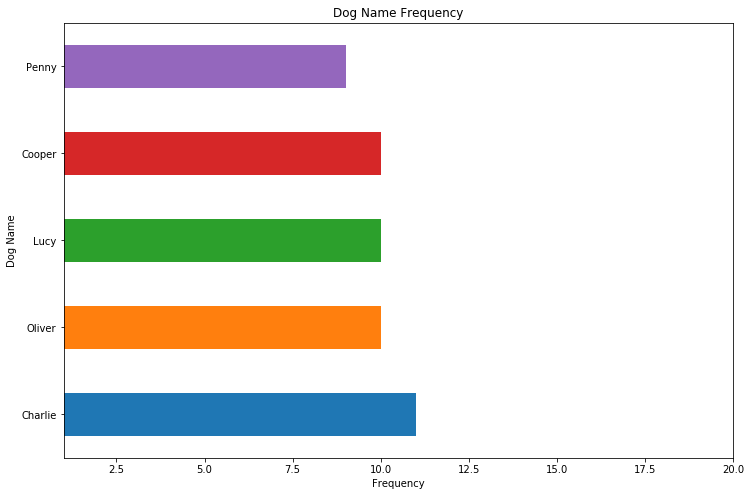

In [57]:
# Plot the top 5 Dog names by frequency
plt.figure(figsize=(12, 8))
dog_names = twitter_data.name.value_counts().nlargest(5).plot(kind = 'barh');
dog_names.set_title('Dog Name Frequency');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Name');
dog_names.set_xlim(1, 20);

In [58]:
# The top 1 dog type
twitter_data.p1.value_counts().head(1)

golden retriever    139
Name: p1, dtype: int64

Text(0.5,0.98,'Most common dog type')

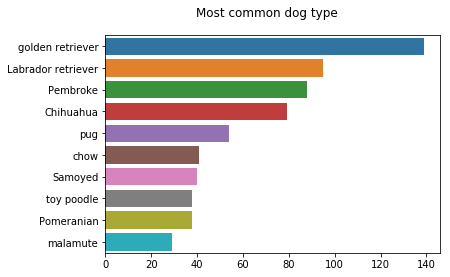

In [59]:
# Most common dog types
dog_type = twitter_data['p1'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Most common dog type')

In [60]:
# View summary data for the rating numerator in the cleaned combined_archive dataframe
twitter_data.rating_numerator.describe()

count    1994.000000
mean       12.237101
std        41.471197
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### Visualization

Text(0.5,1,'Rating Vs Retweet Counts')

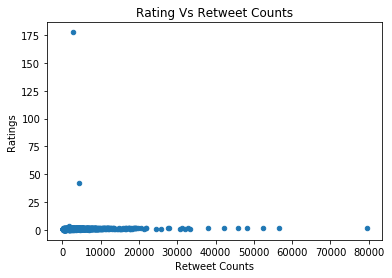

In [61]:
# rating Vs retweet counts
twitter_data.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Rating Vs Retweet Counts')

The trend that higher rating yields more retweets isn't consistent as per the above graph.

Text(0.5,0.98,'Dog stages')

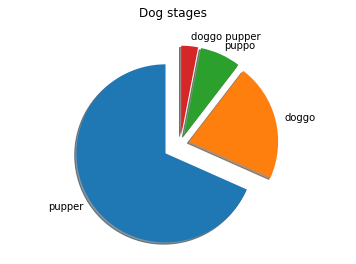

In [62]:
# pie chart of dog stage
dog_stage_count = list(twitter_data[twitter_data['stage'] != 'None']['stage'].value_counts())[0:4]
dog_stages = twitter_data[twitter_data['stage'] != 'None']['stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

plt.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
plt.axis('equal')
plt.suptitle('Dog stages')

The most common dog stage is pupper.

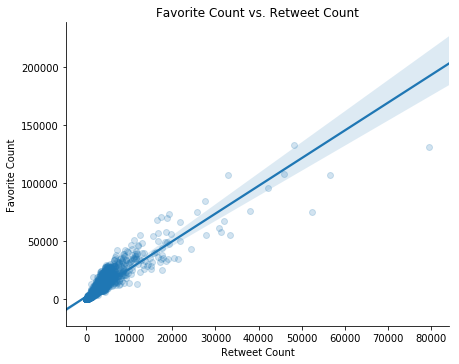

In [63]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_data,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

Favorite counts are correlated with retweet counts - this is a positive correlation.